# Top-down vs. bottom-up

SPDX-License-Identifier: 0BSD

Suppose we want to compute $3 \times 7 + 2 \times 9$.

*Operator precedence*—also called “order of operations”—is a matter of accepted notational convention. (We could agree on a different convention, in which case we’d have to put parentheses in different places to express the same things.) It determines the meaning of an expression. In this example, the expression is a sum of products.

But operator precedence does not always determine *evaluation order*. In this example, we can do the multiplications in either order, but they both must be computed before the addition, because their results are what get added.

This expression tree shows the relationship between the **subproblems**:

In [1]:
from graphviz import Digraph

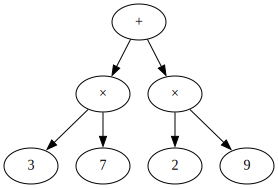

In [2]:
# Draw the tree.
tree = Digraph()
tree.node('left-times', label='\N{MULTIPLICATION SIGN}')
tree.node('right-times', label='\N{MULTIPLICATION SIGN}')
tree.edge('+', 'left-times')
tree.edge('left-times', '3')
tree.edge('left-times', '7')
tree.edge('+', 'right-times')
tree.edge('right-times', '2')
tree.edge('right-times', '9')
tree

*We can evaluate this expression **top-down***, which is naturally recursive. When we try to compute the sum, we notice that the product $3 \times 7$ must first be computed, so do that. For this, we must first know the values of $3$ and $7$, but they’re literals, so we already do. Having now *returned* to our effort to compute the sum, we notice that the product $2 \times 9$ must first be computed, so do that. For this, we must know the values of $2$ and $9$, but they’re literals, so we do. (Or we could have gone right to left and computed $2 \times 9$ before $3 \times 7$.) Then the sum can be computed.

*Or we can evaluate it **bottom-up***, which is naturally iterative. Notice that the solutions to all subproblems of $3 \times 7$&mdash;the literals $3$ and $7$—are known, so compute $3 \times 7$. Notice that the solutions to all subproblems of $2 \times 9$&mdash;the literals $2$ and $9$—are known, so compute $2 \times 9$. (Or we could have gone right to left and computed $2 \times 9$ before $3 \times 7$.) Notice, now, that the solutions to all subproblems of the whole sum are known, so compute it.

Mergesort likewise consists of smaller subproblems whose solutions are needed by bigger subproblems.  You&rsquo;ve implemented **top-down mergesort**, in `recursion.merge_sort`.

Can you implement **bottom-up mergesort**?

---

**Note:** Mergesort doesn’t have *overlapping* subproblems, but many other important problems do, and the subject of overlapping subproblems is examined and visualized below.

## General example of a simple case of overlapping subproblems

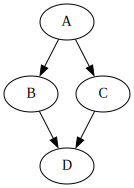

In [3]:
dag = Digraph()
dag.edge('A', 'B')
dag.edge('A', 'C')
dag.edge('B', 'D')
dag.edge('C', 'D')
dag

## Fibonacci

In [4]:
from palgoviz.fibonacci import fibonacci

In [5]:
fibonacci(10)

55

In [6]:
def drawfibn(n):
    fib = Digraph()
    for x in range(n + 1):
        if x == 0:
            fib.node('0')
        elif x ==1:
            fib.node('1')
        else: 
            fib.edge(str(x),str(x-2))
            fib.edge(str(x),str(x-1))
    return fib

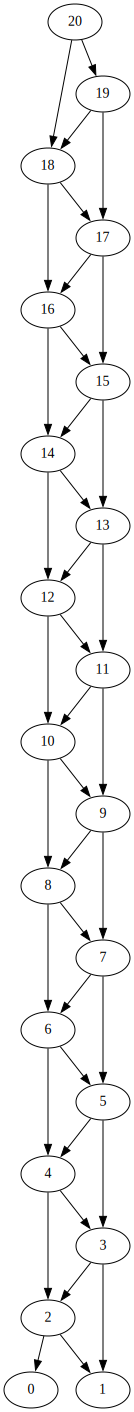

In [7]:
drawfibn(20)

**Note:** The function `fibonacci_better` has been moved to `fibonacci.py`.